In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AnalyticsChallenge2020Data.csv")
data = data[data['Spike']!=1].reset_index(drop=True)
data.drop('Spike',axis=1)
print(len(data))
data.head()

73873


,GameID,EventID,Season,Week,StadiumName,OffensiveTeam,DefensiveTeam,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,...,IsRushing,SoloTackle,AssistedTackle,Pressure,SoloSack,AssistedSack,PassBreakup,Interception,ForcedFumble,RecoveredFumble
0,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [3]:
kneels = []
for i in range(len(data)):
    if 'kneel' in data['PlayDesc'][i]:
        kneels.append(i)
    if data['EventType'][i] == 'challenge rush':
        data.loc[i,'EventType'] = 'rush'
    if data['EventType'][i] == 'challenge pass':
        data.loc[i,'EventType'] = 'pass'
print(data['PlayDesc'][kneels[0]])
data = data.drop(kneels,axis=0).reset_index(drop=True)
print(len(data))

(1:16) J.Garoppolo kneels to ARI 38 for -1 yards.
72870


In [4]:
diff = []
for i in range(len(data)):
    if type(data['RunDirection'][i]) == float:
        data.loc[i,'RunDirection'] = 'Pass'
    diff.append(data['DefTeamScoreBefore'][i] - data['OffTeamScoreBefore'][i])
data['Diff'] = diff
data.head()

,GameID,EventID,Season,Week,StadiumName,OffensiveTeam,DefensiveTeam,OffTeamScoreBefore,DefTeamScoreBefore,Quarter,...,SoloTackle,AssistedTackle,Pressure,SoloSack,AssistedSack,PassBreakup,Interception,ForcedFumble,RecoveredFumble,Diff
0,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2630,10,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2630,15,2019,9,State Farm Stadium,Cardinals,49ers,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [5]:
blowout = []
for i in range(len(data)):
    if abs(data['Diff'][i]) > 30:
        blowout.append(i)
print(str(data['OffTeamScoreBefore'][blowout[0]])+" - "+str(data['DefTeamScoreBefore'][blowout[0]]))
data = data.drop(blowout,axis=0).reset_index(drop=True)
len(data)

10 - 42


71427

In [6]:
teams = list(set(data['DefensiveTeam']))
allsnaps = {}
rushsnaps = {}
passsnaps ={}
for i in teams:
    allsnaps[i] = len(data[data['OffensiveTeam']==i].groupby(['GameID','EventID']).mean().reset_index()[['GameID','EventID']])
    rushsnaps[i] = len(data[(data['OffensiveTeam']==i)&(data['EventType']=='rush')].groupby(['GameID','EventID']).mean().reset_index()[['GameID','EventID']])
    passsnaps[i] = len(data[(data['OffensiveTeam']==i)&(data['EventType']=='pass')].groupby(['GameID','EventID']).mean().reset_index()[['GameID','EventID']])

In [7]:
allc = 100; pc = 50
allepa = pd.DataFrame(data.groupby(['DefensiveTeam','RosterPosition','Name']).mean()['EPA']).reset_index()
allcount = pd.DataFrame(data.groupby(['DefensiveTeam','RosterPosition','Name']).count()['Quarter']).reset_index()
allepa = allepa.merge(allcount,on=['DefensiveTeam','RosterPosition','Name']).rename(columns={"Quarter":"Count"})
allepa = allepa[allepa['Count']>=allc].reset_index(drop=True)
rushepa = pd.DataFrame(data[data['EventType']=='rush'].groupby(['DefensiveTeam','RosterPosition','Name']).mean()['EPA']).reset_index()
rushcount = pd.DataFrame(data[data['EventType']=='rush'].groupby(['DefensiveTeam','RosterPosition','Name']).count()['Quarter']).reset_index()
rushepa = rushepa.merge(rushcount,on=['DefensiveTeam','RosterPosition','Name']).rename(columns={"Quarter":"Count"})
rushepa = rushepa[rushepa['Count']>=pc].reset_index(drop=True)
passepa = pd.DataFrame(data[data['EventType']=='pass'].groupby(['DefensiveTeam','RosterPosition','Name']).mean()['EPA']).reset_index()
passcount = pd.DataFrame(data[data['EventType']=='pass'].groupby(['DefensiveTeam','RosterPosition','Name']).count()['Quarter']).reset_index()
passepa = passepa.merge(passcount,on=['DefensiveTeam','RosterPosition','Name']).rename(columns={"Quarter":"Count"})
passepa = passepa[passepa['Count']>=pc].reset_index(drop=True)
passepa.head()

,DefensiveTeam,RosterPosition,Name,EPA,Count
0,49ers,DE,Arik Armstead,0.006190,273
1,49ers,DE,Nick Bosa,-0.024355,278
2,49ers,DE,Solomon Thomas,-0.056070,159
3,49ers,DT,D.J. Jones,0.196682,53
4,49ers,DT,DeForest Buckner,-0.024508,278


In [8]:
#High Level Overview Stats

In [9]:
print('Mean EPA by Position')
print(allepa.groupby('RosterPosition').mean()['EPA'])
print('\nMedian EPA by Position')
print(allepa.groupby('RosterPosition').median()['EPA'])
print('\nDeviation in EPA by Position')
print(allepa.groupby('RosterPosition').std()['EPA'])

Mean EPA by Position
RosterPosition
DE   -0.023297
DT   -0.018045
LB    0.011751
Name: EPA, dtype: float64

Median EPA by Position
RosterPosition
DE   -0.027922
DT   -0.009646
LB    0.010206
Name: EPA, dtype: float64

Deviation in EPA by Position
RosterPosition
DE    0.103998
DT    0.086514
LB    0.112972
Name: EPA, dtype: float64


In [10]:
print("Best DE: "+str(min(allepa[allepa['RosterPosition']=='DE']['EPA'])))
print("Best DT: "+str(min(allepa[allepa['RosterPosition']=='DT']['EPA'])))
print("Best LB: "+str(min(allepa[allepa['RosterPosition']=='LB']['EPA'])))
print("Worst DE: "+str(max(allepa[allepa['RosterPosition']=='DE']['EPA'])))
print("Worst DT: "+str(max(allepa[allepa['RosterPosition']=='DT']['EPA'])))
print("Worst LB: "+str(max(allepa[allepa['RosterPosition']=='LB']['EPA'])))

Best DE: -0.3161371043478262
Best DT: -0.20975768656716412
Best LB: -0.22674545588235323
Worst DE: 0.2206350736434108
Worst DT: 0.20670634892086345
Worst LB: 0.20627800591715978


In [11]:
#Adjust each player for being on/off field for true player impact

In [12]:
def epa_player(epa_data,full_data,play_type):
    if play_type == 'all':
        full_data = full_data
    else:
        full_data = full_data[full_data['EventType']==play_type]
    new_data = epa_data
    names = list(new_data['Name'])
    player_nonplay = []
    player_nonplay_counts = []
    for i in names:
        team = list(new_data[new_data['Name']==i]['DefensiveTeam'])[0]
        games = list(set(full_data[full_data['DefensiveTeam']==team]['GameID']))
        nonplay = []
        nonplay_counts = 0
        for j in games:
            this_game = full_data[(full_data['GameID']==j)&(full_data['DefensiveTeam']==team)].reset_index(drop=True)
            plays = sorted(list(set(this_game['EventID'])))
            for k in plays:
                players = list(this_game[this_game['EventID']==k]['Name'])
                if i not in list(players):
                    nonplay.append(list(this_game[this_game['EventID']==k]['EPA'])[0])
                    nonplay_counts += 1
        if nonplay_counts > 0:
            player_nonplay.append(np.mean(nonplay))
            player_nonplay_counts.append(nonplay_counts)
        else:
            player_nonplay.append(0)
            player_nonplay_counts.append(0)
        
    
    new_data['NonPlay_Count'] = player_nonplay_counts    
    new_data['NonPlay_EPA'] = player_nonplay
    new_data['Diff_EPA'] = new_data['EPA'] - new_data['NonPlay_EPA']
    
    
    return new_data

In [13]:
def epa_clean(epa_data):
    new_data = epa_data
    names = list(new_data['Name'])
    removes = []
    for i in range(len(new_data)):
        row = new_data.loc[i]
        if np.isnan(row['Diff_EPA']) == True:
            removes.append(i)
        elif row['Count'] / (row['NonPlay_Count'] + row['Count']) > 0.95:
            removes.append(i)
    new_data = new_data.drop(removes,axis=0).reset_index(drop=True)
    
    return new_data

In [14]:
allepa = epa_clean(epa_player(allepa,data,'all'))
rushepa = epa_clean(epa_player(rushepa,data,'rush'))
passepa = epa_clean(epa_player(passepa,data,'pass'))

In [15]:
#Pass EPA Stats
print('Mean Pass EPA by Position')
print(passepa.groupby('RosterPosition').mean()['Diff_EPA'])
print('\nMedian Pass EPA by Position')
print(passepa.groupby('RosterPosition').median()['Diff_EPA'])
print('\nDeviation in Pass EPA by Position')
print(passepa.groupby('RosterPosition').std()['Diff_EPA'])

Mean Pass EPA by Position
RosterPosition
DE   -0.041891
DT    0.018039
LB    0.015616
Name: Diff_EPA, dtype: float64

Median Pass EPA by Position
RosterPosition
DE   -0.020413
DT    0.030135
LB   -0.035959
Name: Diff_EPA, dtype: float64

Deviation in Pass EPA by Position
RosterPosition
DE    0.184019
DT    0.177268
LB    0.185888
Name: Diff_EPA, dtype: float64


In [16]:
print("Best Pass DE: "+str(min(passepa[passepa['RosterPosition']=='DE']['Diff_EPA'])))
print("Best Pass DT: "+str(min(passepa[passepa['RosterPosition']=='DT']['Diff_EPA'])))
print("Best Pass LB: "+str(min(passepa[passepa['RosterPosition']=='LB']['Diff_EPA'])))
print("Worst Pass DE: "+str(max(passepa[passepa['RosterPosition']=='DE']['Diff_EPA'])))
print("Worst Pass DT: "+str(max(passepa[passepa['RosterPosition']=='DT']['Diff_EPA'])))
print("Worst Pass LB: "+str(max(passepa[passepa['RosterPosition']=='LB']['Diff_EPA'])))

Best Pass DE: -0.44881528593372844
Best Pass DT: -0.506976404835391
Best Pass LB: -0.345543482751938
Worst Pass DE: 0.48489605740740727
Worst Pass DT: 0.45237310885978427
Worst Pass LB: 0.4916225171568628


In [17]:
#Rush EPA Stats
print('Mean Rush EPA by Position')
print(rushepa.groupby('RosterPosition').mean()['Diff_EPA'])
print('\nMedian Rush EPA by Position')
print(rushepa.groupby('RosterPosition').median()['Diff_EPA'])
print('\nDeviation in Rush EPA by Position')
print(rushepa.groupby('RosterPosition').std()['Diff_EPA'])

Mean Rush EPA by Position
RosterPosition
DE   -0.012002
DT   -0.038053
LB    0.007096
Name: Diff_EPA, dtype: float64

Median Rush EPA by Position
RosterPosition
DE   -0.012937
DT   -0.032729
LB    0.012410
Name: Diff_EPA, dtype: float64

Deviation in Rush EPA by Position
RosterPosition
DE    0.138979
DT    0.129851
LB    0.151007
Name: Diff_EPA, dtype: float64


In [18]:
print("Best Rush DE: "+str(min(rushepa[rushepa['RosterPosition']=='DE']['Diff_EPA'])))
print("Best Rush DT: "+str(min(rushepa[rushepa['RosterPosition']=='DT']['Diff_EPA'])))
print("Best Rush LB: "+str(min(rushepa[rushepa['RosterPosition']=='LB']['Diff_EPA'])))
print("Worst Rush DE: "+str(max(rushepa[rushepa['RosterPosition']=='DE']['Diff_EPA'])))
print("Worst Rush DT: "+str(max(rushepa[rushepa['RosterPosition']=='DT']['Diff_EPA'])))
print("Worst Rush LB: "+str(max(rushepa[rushepa['RosterPosition']=='LB']['Diff_EPA'])))

Best Rush DE: -0.3147067377717391
Best Rush DT: -0.3665152368647717
Best Rush LB: -0.2967937305555555
Worst Rush DE: 0.32078809794520546
Worst Rush DT: 0.2968121364514349
Worst Rush LB: 0.3547277139097744


In [19]:
pos = list(set(allepa['RosterPosition']))
boxall = []
boxrush = []
boxpass = []       
for i in pos:
    boxall.append(np.array(allepa[allepa['RosterPosition']==i]['Diff_EPA']))
    boxrush.append(np.array(rushepa[rushepa['RosterPosition']==i]['Diff_EPA']))
    boxpass.append(np.array(passepa[passepa['RosterPosition']==i]['Diff_EPA']))

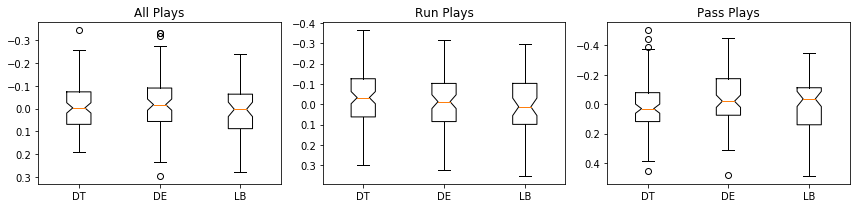

In [20]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.boxplot(boxall, notch=True)
plt.xticks(np.arange(1,len(pos)+1),labels=pos)
#plt.ylim(-0.55,0.55)
plt.gca().invert_yaxis()
plt.title('All Plays')
plt.subplot(1,3,2)
plt.boxplot(boxrush, notch=True)
plt.xticks(np.arange(1,len(pos)+1),labels=pos)
#plt.ylim(-0.55,0.55)
plt.gca().invert_yaxis()
plt.title('Run Plays')
plt.subplot(1,3,3)
plt.boxplot(boxpass, notch=True)
plt.xticks(np.arange(1,len(pos)+1),labels=pos)
#plt.ylim(-0.55,0.55)
plt.gca().invert_yaxis()
plt.title('Pass Plays')
plt.tight_layout()

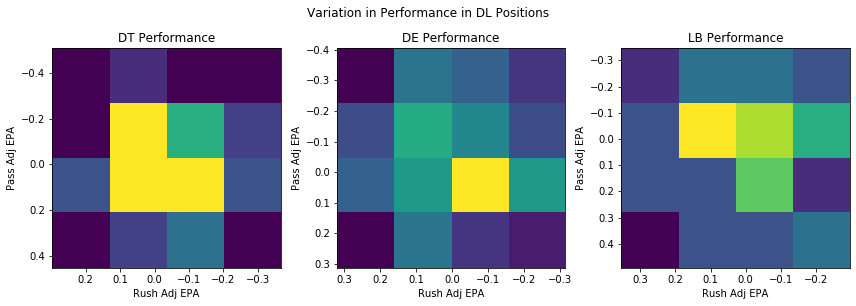

In [21]:
scatter_data = rushepa.merge(passepa,how='inner',on=['DefensiveTeam','Name','RosterPosition'],suffixes=('_rush','_pass'))
n = 4; cm = 'viridis'
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
s_data = scatter_data[scatter_data['RosterPosition']=='DT']
plt.hist2d(s_data['Diff_EPA_rush'],s_data['Diff_EPA_pass'],bins=n,cmap=cm)
plt.xlabel('Rush Adj EPA'); plt.ylabel('Pass Adj EPA')
plt.title("DT Performance")
plt.gca().invert_yaxis(); plt.gca().invert_xaxis()
plt.subplot(1,3,2)
s_data = scatter_data[scatter_data['RosterPosition']=='DE']
plt.hist2d(s_data['Diff_EPA_rush'],s_data['Diff_EPA_pass'],bins=n,cmap=cm)
plt.xlabel('Rush Adj EPA'); plt.ylabel('Pass Adj EPA')
plt.title("DE Performance")
plt.gca().invert_yaxis(); plt.gca().invert_xaxis()
plt.subplot(1,3,3)
s_data = scatter_data[scatter_data['RosterPosition']=='LB']
plt.hist2d(s_data['Diff_EPA_rush'],s_data['Diff_EPA_pass'],bins=n,cmap=cm)
plt.xlabel('Rush Adj EPA'); plt.ylabel('Pass Adj EPA')
plt.title("LB Performance")
plt.gca().invert_yaxis(); plt.gca().invert_xaxis()
plt.suptitle('Variation in Performance in DL Positions',y=1.05)
plt.tight_layout()